<a href="https://colab.research.google.com/github/dsfdev2023/studentEvaluatiuon/blob/main/HR_Henry's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORATORY DATA ANALYSIS**

# **Factory Workers’ Daily Performance & Attrition**

**Life cycle of Machine learning Project:**

    Understanding the Problem Statement
    Data Collection
    Data Checks to perform
    Exploratory data analysis
    Data Pre-Processing
    Model Training
    Choose best model


**Problem statement**

This synthetic dataset contains 18 months’ worth of daily performance and attrition data (411,948 observations) for a factory whose organizational structure comprises 508 workers. Due to employee turnover, a total of 687 persons appear in the dataset. The dataset’s observations cover both regular daily events (like workers’ attendance and daily level of Efficacy) and special one-time events (like accidents, an employee’s termination, or the onboarding of a new employee). A unique feature of the dataset is diverse causal relationships “hidden” within the data that are waiting to be uncovered through machine learning.

**Data Collection**

Dataset Source -https://www.kaggle.com/datasets/gladdenme/factory-workers-daily-performance-attrition-s

## **Organizational structure**
At any given moment, the factory’s workforce comprises 508 persons, including 1 Production Director who oversees the entire factory; 3 Shift Managers; 24 Team Leaders (8 for each shift); and 480 Laborers (who are divided into teams of 24 teams of 20 persons). The Production Director has subordinates but no supervisor, while Laborers have a supervisor but no subordinates. Each Laborer reports to a particular Team Leader; each Team Leader reports to a single Shift Manager; and all of the Shift Managers report to the Production Director.

## **Import ML Packages**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
!pip install openpyxl

In [6]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATASET CLEANING**

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Henrys/hrecords.csv', encoding='ISO-8859-1')

# Display the first few rows of the DataFrame
print(df.head())

     sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team  \
0  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
1  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
2  98000002       Joan    Winter       61       F   Shift 1   Team 2   
3  98000002       Joan    Winter       61       F   Shift 1   Team 2   
4  98000003  Elizabeth  Martinez       20       F   Shift 1   Team 3   

      sub_role                                       sub_coll_IDs  \
0  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...   
1  Team Leader  [98000002, 98000003, 98000004, 98000005, 98000...   
2  Team Leader  [98000001, 98000003, 98000004, 98000005, 98000...   
3  Team Leader  [98000001, 98000003, 98000004, 98000005, 98000...   
4  Team Leader  [98000001, 98000002, 98000004, 98000005, 98000...   

  sub_colls_same_sex_prtn  ...  event_weekday_num  event_weekday_name  \
0             0.714285714  ...                  4              Friday   
1     

In [14]:
# Assuming df is your DataFrame
for column in df.columns:
    print(column)


sub_ID
sub_fname
sub_lname
sub_age
sub_sex
sub_shift
sub_team
sub_role
sub_coll_IDs
sub_colls_same_sex_prtn
sub_health_h
sub_commitment_h
sub_perceptiveness_h
sub_dexterity_h
sub_sociality_h
sub_goodness_h
sub_strength_h
sub_openmindedness_h
sub_workstyle_h
sup_ID
sup_fname
sup_lname
sup_age
sup_sub_age_diff
sup_sex
sup_role
sup_commitment_h
sup_perceptiveness_h
sup_goodness_h
event_date
event_week_in_series
event_day_in_series
event_weekday_num
event_weekday_name
behav_comptype_h
behav_cause_h
actual_efficacy_h
record_comptype
record_cause
recorded_efficacy
recorded_note_from_sup
record_conf_matrix_h


In [16]:
# List of columns to keep
columns_to_keep = [
    "sub_ID", "sub_fname", "sub_lname", "sub_age", "sub_sex", "sub_shift",
    "sub_team", "sub_role", "sup_ID", "sup_fname", "sup_lname", "sup_age",
    "sup_sub_age_diff", "sup_sex", "sup_role", "event_date", "behav_comptype_h",
    "behav_cause_h", "actual_efficacy_h", "record_comptype", "record_cause",
    "recorded_efficacy"
]

# Filter the DataFrame to only include the desired columns
df = df[columns_to_keep]

# Display the first few rows of the updated DataFrame
print(df.head())


     sub_ID  sub_fname sub_lname  sub_age sub_sex sub_shift sub_team  \
0  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
1  98000001    Rebecca     Bauer       40       F   Shift 1   Team 1   
2  98000002       Joan    Winter       61       F   Shift 1   Team 2   
3  98000002       Joan    Winter       61       F   Shift 1   Team 2   
4  98000003  Elizabeth  Martinez       20       F   Shift 1   Team 3   

      sub_role    sup_ID sup_fname  ... sup_sub_age_diff sup_sex  \
0  Team Leader  98000216     Susan  ...              -16       F   
1  Team Leader  98000216     Susan  ...              -16       F   
2  Team Leader  98000216     Susan  ...              -37       F   
3  Team Leader  98000216     Susan  ...              -37       F   
4  Team Leader  98000216     Susan  ...                4       F   

        sup_role event_date behav_comptype_h behav_cause_h actual_efficacy_h  \
0  Shift Manager   1/1/2021         Presence          None              None  

In [17]:
for column in df.columns:
    print(column)

sub_ID
sub_fname
sub_lname
sub_age
sub_sex
sub_shift
sub_team
sub_role
sup_ID
sup_fname
sup_lname
sup_age
sup_sub_age_diff
sup_sex
sup_role
event_date
behav_comptype_h
behav_cause_h
actual_efficacy_h
record_comptype
record_cause
recorded_efficacy


In [22]:
# List of columns to keep
columns_to_keep = [
    "sub_ID", "sub_age", "sub_sex", "sub_shift", "sub_team",
    "sub_role", "sup_ID", "sup_age", "sup_sub_age_diff",
    "sup_sex", "sup_role", "event_date", "behav_comptype_h",
    "actual_efficacy_h", "recorded_efficacy"
]

# Filter the DataFrame to only include the desired columns
df = df[columns_to_keep]


In [23]:
for column in df.columns:
    print(column)

sub_ID
sub_age
sub_sex
sub_shift
sub_team
sub_role
sup_ID
sup_age
sup_sub_age_diff
sup_sex
sup_role
event_date
behav_comptype_h
actual_efficacy_h
recorded_efficacy


The field **« behav_comptype_h »** indicates the type of behavior that was actually performed by the worker.  

The field **« actual_efficacy_h »**  indicates the actual level of Efficacy displayed by the worker on the given day. (Note this field ends with h, to indicate that their contents are, in theory, “hidden” from persons who only have access to the factory’s HRM/ERP system.)

The field **« recorded_efficacy »** indicates the estimated level of Efficacy attributed to the worker by his or her supervisor on the given day.



**sub_ID:** To identify each worker.

**event_date:** To track daily data.

**actual_efficacy_h:** Actual level of efficacy displayed by the worker.

**recorded_efficacy:** Supervisor's perception of the worker's efficacy.

In [27]:
# Filter relevant columns
filtered_df = df[['sub_ID', 'sub_age','sub_shift','sup_ID','sup_age','event_date','behav_comptype_h', 'actual_efficacy_h', 'recorded_efficacy']]

In [28]:
print(filtered_df.head())

     sub_ID  sub_age sub_shift    sup_ID sup_age event_date behav_comptype_h  \
0  98000001       40   Shift 1  98000216      24   1/1/2021         Presence   
1  98000001       40   Shift 1  98000216      24   1/1/2021         Efficacy   
2  98000002       61   Shift 1  98000216      24   1/1/2021         Presence   
3  98000002       61   Shift 1  98000216      24   1/1/2021         Efficacy   
4  98000003       20   Shift 1  98000216      24   1/1/2021         Presence   

  actual_efficacy_h recorded_efficacy  
0              None              None  
1             1.489               1.2  
2              None              None  
3             1.023               0.8  
4              None              None  


## **Types of observations**

Each row of the dataset reflects a single “event” that occurred on a particular day in relation to a particular worker. It’s possible for a given worker to have more than one event (and row) for the same day; for example, a worker might have “Presence”, “Efficacy”, and “Teamwork” events on the same day, with each event reflecting a different qualitative or quantitative aspect of the person’s performance.

There are 13 types of events reflected in the dataset:

* A **“Presence”** event indicates that a particular worker showed up for work on the given day, while an “Absence” event indicates that the worker failed to show up on a day when he or she was scheduled to work.

* An **“Efficacy”** event reflects the degree of efficiency and productivity that an employee demonstrated over the course of the given workday. There are two related elements: the actual Efficacy that the employee generated on the given day, and the recorded Efficacy that the worker’s supervisor entered into the factory’s HRM/ERP system for the employee for that day. Workers who feel as though their managers are consistently mis-recording their Efficacy levels may eventually become inclined to quit their jobs.

* A **“Resignation”** event indicates that on the given date, an employee quit his or her job.

* A **“Termination”** event is like a Resignation behavior, except that the employee was fired by the organization.

* An **“Onboarding”** event indicates that the subject is a newly hired employee who began work on the given date.

* An **“Idea”** event occurs when an employee imagines some innovative new approach to solving a long-standing problem or otherwise improving the factory’s functioning.

* A **“Lapse”** behavior occurs when a worker makes some severe mental mistake that negatively impacts the factory’s functioning (e.g., by omitting some step from a business process or ordering the wrong parts).

* A **“Feat”** behavior occurs when an employee performs some exceptional act dependent on physical skill (e.g., expertly manipulating some high-precision tool or sorting objects into bins with remarkable speed).

* A **“Slip”** behavior occurs when an employee experiences some accident or misstep resulting from a lack of physical adroitness (e.g., knocking over a storage rack or dropping some delicate instrument).

* A **“Teamwork”** behavior occurs when an employee goes to exceptional lengths to encourage, teach, or otherwise support his or her colleagues in some way.

* A **“Disruption”** behavior occurs when an employee quarrels with colleagues, belligerently rejects a supervisor’s request, or otherwise displays a hostile attitude toward his or her coworkers.

* A **“Sacrifice”** behavior occurs when a worker performs – of his or her own initiative – some action that’s unpleasant or inconvenient for the employee but which spares others from suffering the same hardship.

* A **“Sabotage”** behavior occurs when an employee knowingly performs some act (typically, with the hope that he or she won’t be observed while doing so) that will damage equipment, spoil products, or otherwise lessen the organization’s productivity or harm its brand image.

## **Initial Data Inspection**

In [29]:
# Check data types and null values
print(filtered_df.info())

# Get basic statistics
print(filtered_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   sub_ID             411948 non-null  int64 
 1   sub_age            411948 non-null  int64 
 2   sub_shift          411948 non-null  object
 3   sup_ID             411948 non-null  object
 4   sup_age            411948 non-null  object
 5   event_date         411948 non-null  object
 6   behav_comptype_h   411948 non-null  object
 7   actual_efficacy_h  411948 non-null  object
 8   recorded_efficacy  411948 non-null  object
dtypes: int64(2), object(7)
memory usage: 28.3+ MB
None
             sub_ID        sub_age
count  4.119480e+05  411948.000000
mean   9.800036e+07      41.395637
std    2.076600e+02      13.735554
min    9.800000e+07      18.000000
25%    9.800019e+07      29.000000
50%    9.800036e+07      41.000000
75%    9.800053e+07      53.000000
max    9.800079e+07      6

**Modify Data Types:**

In [38]:
# Extract numbers from sub_shift
filtered_df['sub_shift'] = filtered_df['sub_shift'].astype(str)


# Fill NaN values with a default number, say 0, and then convert to int64
filtered_df['sub_shift'].fillna(0, inplace=True)
filtered_df['sub_shift'] = filtered_df['sub_shift'].astype('int64')

# Continue with the rest of the conversions...

# Replace 'None' with 0 in the sup_ID column
filtered_df['sup_ID'] = filtered_df['sup_ID'].replace('None', 0)

# Convert sup_ID to int64
filtered_df['sup_ID'] = filtered_df['sup_ID'].astype('int64')

# Replace 'None' with 0 in the sup_age column
filtered_df['sup_age'] = filtered_df['sup_age'].replace('None', 0)

# Convert sup_age to int64
filtered_df['sup_age'] = filtered_df['sup_age'].astype('int64')

# Step 1: Convert to datetime type (just to ensure)
filtered_df['event_date'] = pd.to_datetime(filtered_df['event_date'])

# Step 2: Extract the date part
filtered_df['event_date'] = filtered_df['event_date'].dt.date

# Replace 'None' with 0.0 in the actual_efficacy_h column
filtered_df['actual_efficacy_h'] = filtered_df['actual_efficacy_h'].replace('None', 0.0)

# Convert actual_efficacy_h to float
filtered_df['actual_efficacy_h'] = filtered_df['actual_efficacy_h'].astype('float')

# Continue with the rest of the conversions...

# Convert recorded_efficacy to float
# If 'None' exists in this column as well, replace it before conversion
filtered_df['recorded_efficacy'] = filtered_df['recorded_efficacy'].replace('None', 0.0)
filtered_df['recorded_efficacy'] = filtered_df['recorded_efficacy'].astype('float')

# Verify the changes
print(filtered_df.info())


<ipython-input-38-dac013ff86a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sub_shift'] = filtered_df['sub_shift'].astype(str)
<ipython-input-38-dac013ff86a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sub_shift'].fillna(0, inplace=True)
<ipython-input-38-dac013ff86a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411948 entries, 0 to 411947
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_ID             411948 non-null  int64  
 1   sub_age            411948 non-null  int64  
 2   sub_shift          411948 non-null  int64  
 3   sup_ID             411948 non-null  int64  
 4   sup_age            411948 non-null  int64  
 5   event_date         411948 non-null  object 
 6   behav_comptype_h   411948 non-null  object 
 7   actual_efficacy_h  411948 non-null  float64
 8   recorded_efficacy  411948 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 28.3+ MB
None


**Visualize Distributions**

In [43]:
# Drop rows where either 'actual_efficacy_h' or 'recorded_efficacy' equals 0
filtered_df = filtered_df[(filtered_df['actual_efficacy_h'] != 0) & (filtered_df['recorded_efficacy'] != 0)]

# Output the new total number of instances
new_instance_count = filtered_df.shape[0]
print(f"Total number of instances after dropping rows: {new_instance_count}")


Total number of instances after dropping rows: 182130


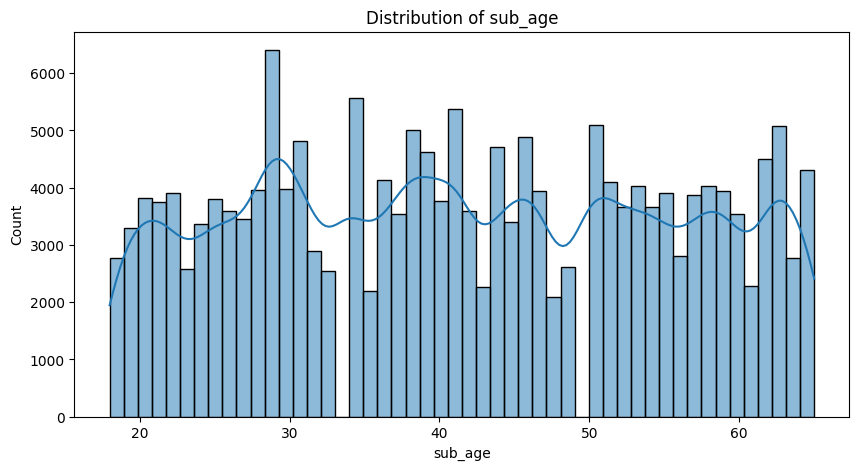

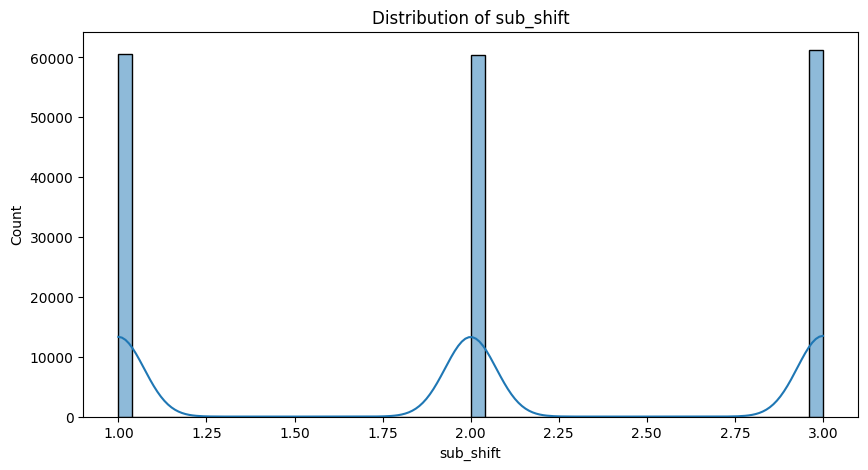

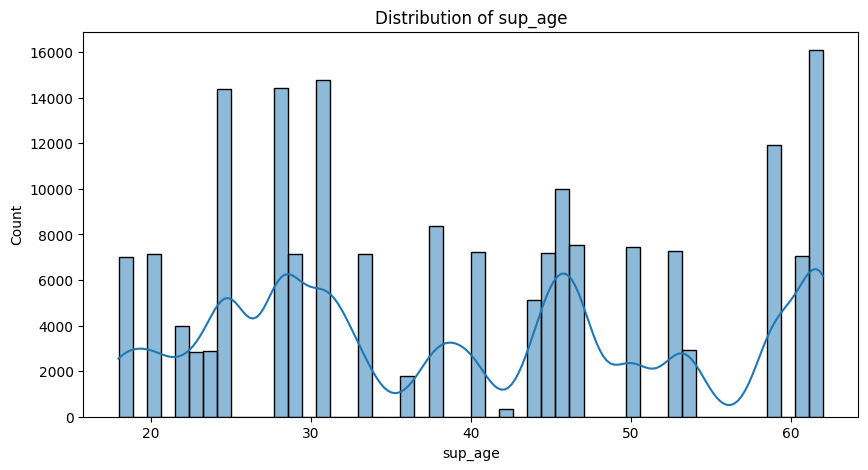

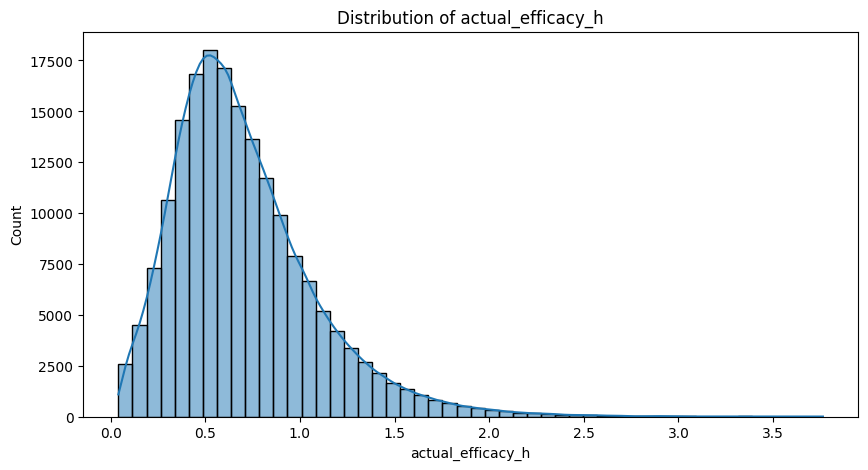

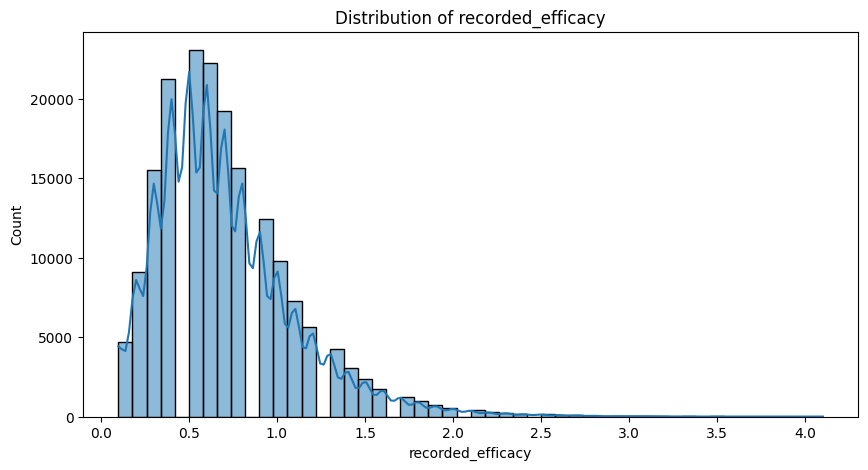

In [44]:
# Visualizing the distribution for numerical columns
numerical_columns = ['sub_age','sub_shift','sup_age','actual_efficacy_h', 'recorded_efficacy']

for col in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(filtered_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Statistics**

In [45]:
# Get basic statistics
print(filtered_df.drop(columns=['sub_ID', 'sup_ID']).describe())

             sub_age      sub_shift        sup_age  actual_efficacy_h  \
count  182130.000000  182130.000000  182130.000000      182130.000000   
mean       41.620365       2.004036      39.839395           0.702451   
std        13.639840       0.817534      13.991768           0.376660   
min        18.000000       1.000000      18.000000           0.041000   
25%        30.000000       1.000000      28.000000           0.441000   
50%        41.000000       2.000000      38.000000           0.634000   
75%        53.000000       3.000000      50.000000           0.891000   
max        65.000000       3.000000      62.000000           3.763000   

       recorded_efficacy  
count      182130.000000  
mean            0.702453  
std             0.394478  
min             0.100000  
25%             0.400000  
50%             0.600000  
75%             0.900000  
max             4.100000  


In [46]:
# Count rows where 'actual_efficacy_h' is equal to 'recorded_efficacy'
matching_rows_count = filtered_df[filtered_df['actual_efficacy_h'] == filtered_df['recorded_efficacy']].shape[0]

# Total number of instances
total_rows = filtered_df.shape[0]

# Calculate the percentage
matching_percentage = (matching_rows_count / total_rows) * 100

print(f"Total number of instances where 'actual_efficacy_h' is equal to 'recorded_efficacy': {matching_rows_count}")
print(f"Total number of instances: {total_rows}")
print(f"Percentage of instances where 'actual_efficacy_h' is equal to 'recorded_efficacy': {matching_percentage:.2f}%")


Total number of instances where 'actual_efficacy_h' is equal to 'recorded_efficacy': 729
Total number of instances: 182130
Percentage of instances where 'actual_efficacy_h' is equal to 'recorded_efficacy': 0.40%


In [47]:
# Check Unique Values
print("\nUnique values for each column:")
for col in filtered_df.columns:
    print(f"{col}: {filtered_df[col].nunique()} unique values")


Unique values for each column:
sub_ID: 686 unique values
sub_age: 48 unique values
sub_shift: 3 unique values
sup_ID: 33 unique values
sup_age: 24 unique values
event_date: 433 unique values
behav_comptype_h: 1 unique values
actual_efficacy_h: 2567 unique values
recorded_efficacy: 40 unique values


In [55]:
filtered_df = filtered_df.drop(columns='behav_comptype_h')


In [56]:
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182130 entries, 1 to 411947
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_ID             182130 non-null  int64  
 1   sub_age            182130 non-null  int64  
 2   sub_shift          182130 non-null  int64  
 3   sup_ID             182130 non-null  int64  
 4   sup_age            182130 non-null  int64  
 5   event_date         182130 non-null  object 
 6   actual_efficacy_h  182130 non-null  float64
 7   recorded_efficacy  182130 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 12.5+ MB
None


**Correlation Analysis:**

<ipython-input-57-2ee35dd6133e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df.corr()


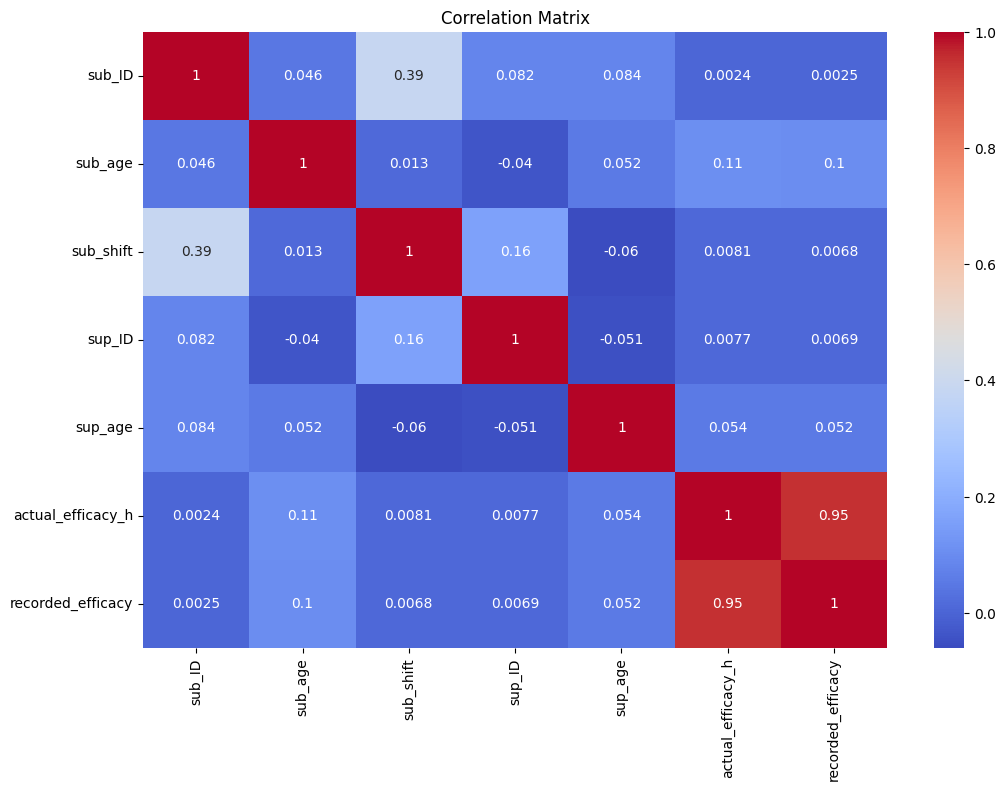

In [57]:
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


**Grouped Analysis:**

<ipython-input-59-9ed993bd9937>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_sub = filtered_df.groupby('sub_shift').mean()['actual_efficacy_h']


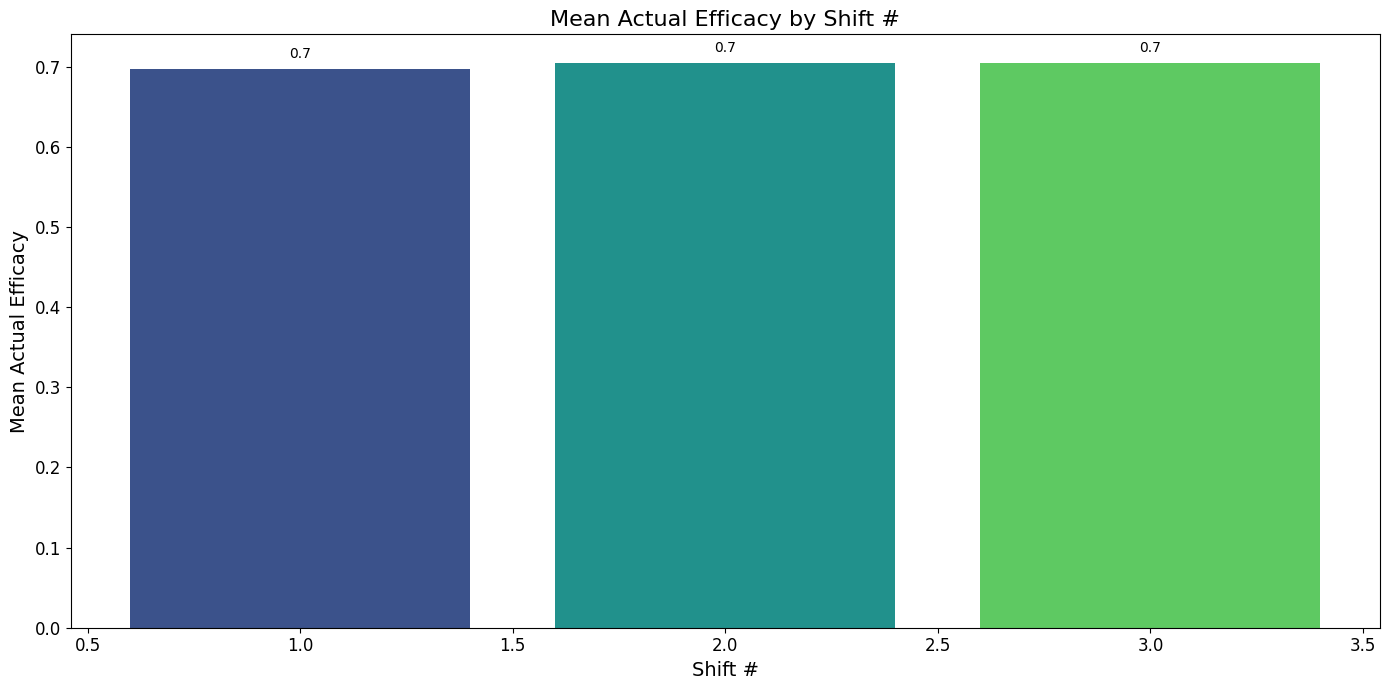

In [59]:
import seaborn as sns

# Grouping data by 'sub_shift'
grouped_by_sub = filtered_df.groupby('sub_shift').mean()['actual_efficacy_h']

# Setting up color palette
palette = sns.color_palette("viridis", len(grouped_by_sub))

# Plotting
plt.figure(figsize=(14, 7))
bars = plt.bar(grouped_by_sub.index, grouped_by_sub.values, color=palette)

# Annotating bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Enhancing visual appearance
plt.title('Mean Actual Efficacy by Shift #', fontsize=16)
plt.xlabel('Shift #', fontsize=14)
plt.ylabel('Mean Actual Efficacy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-60-cabc928ac4b5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_age = filtered_df.groupby('sub_age').mean()['actual_efficacy_h']


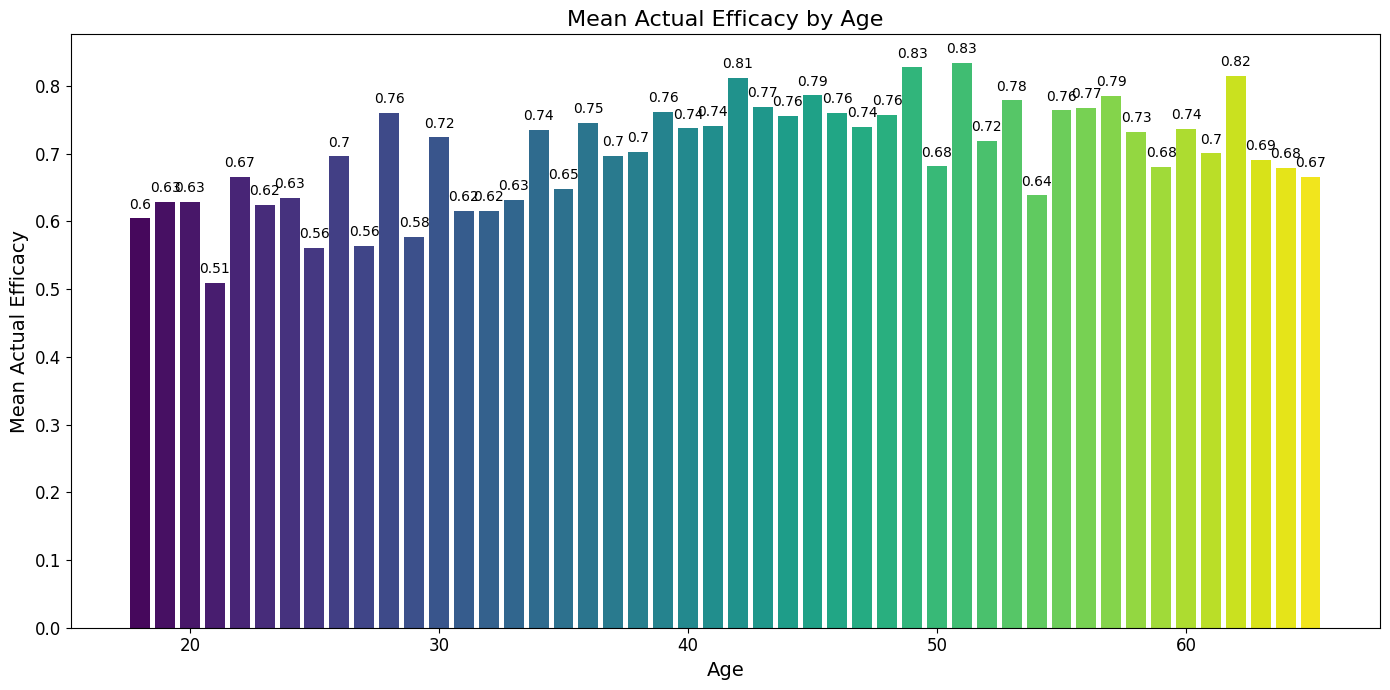

In [60]:
import seaborn as sns

# Grouping data by 'sub_age'
grouped_by_age = filtered_df.groupby('sub_age').mean()['actual_efficacy_h']

# Setting up color palette
palette = sns.color_palette("viridis", len(grouped_by_age))

# Plotting
plt.figure(figsize=(14, 7))
bars = plt.bar(grouped_by_age.index, grouped_by_age.values, color=palette)

# Annotating bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Enhancing visual appearance
plt.title('Mean Actual Efficacy by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mean Actual Efficacy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


<ipython-input-61-62da6c72278c>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = filtered_df.groupby(['sub_age', 'sub_shift']).mean().reset_index()


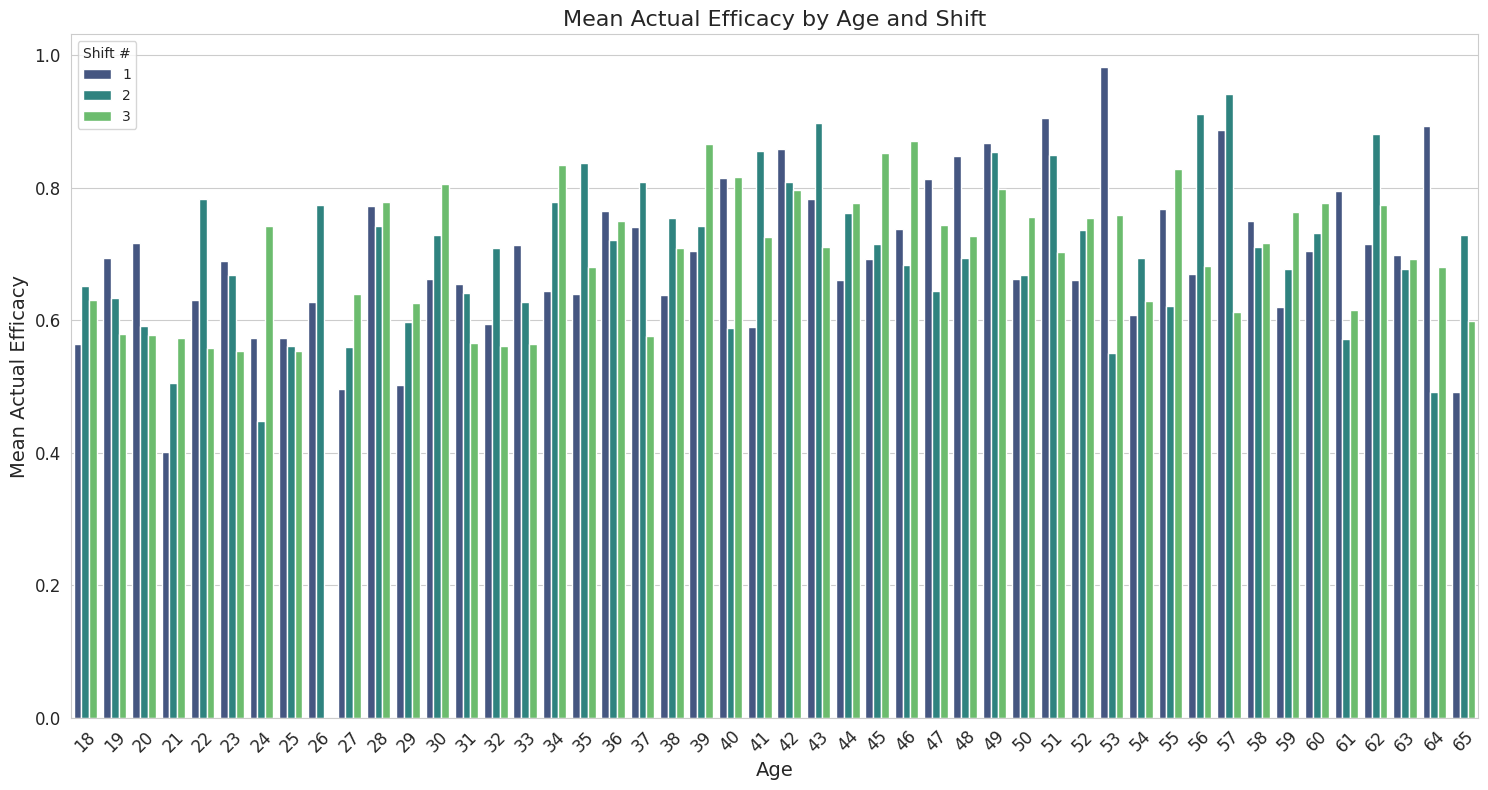

In [61]:
import seaborn as sns

# Setting up the aesthetic style of the plots
sns.set_style("whitegrid")

# Grouping the data by 'sub_age' and 'sub_shift'
grouped_df = filtered_df.groupby(['sub_age', 'sub_shift']).mean().reset_index()

# Plotting the data
plt.figure(figsize=(15, 8))
sns.barplot(x='sub_age', y='actual_efficacy_h', hue='sub_shift', data=grouped_df, palette='viridis')

# Enhancing visual appearance
plt.title('Mean Actual Efficacy by Age and Shift', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Mean Actual Efficacy', fontsize=14)
plt.legend(title='Shift #')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


## **Mean Efficacy by Supervisor Age and Shift**

<ipython-input-62-2a8a68a908a6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = filtered_df.groupby(['sup_age', 'sub_shift']).mean().reset_index()


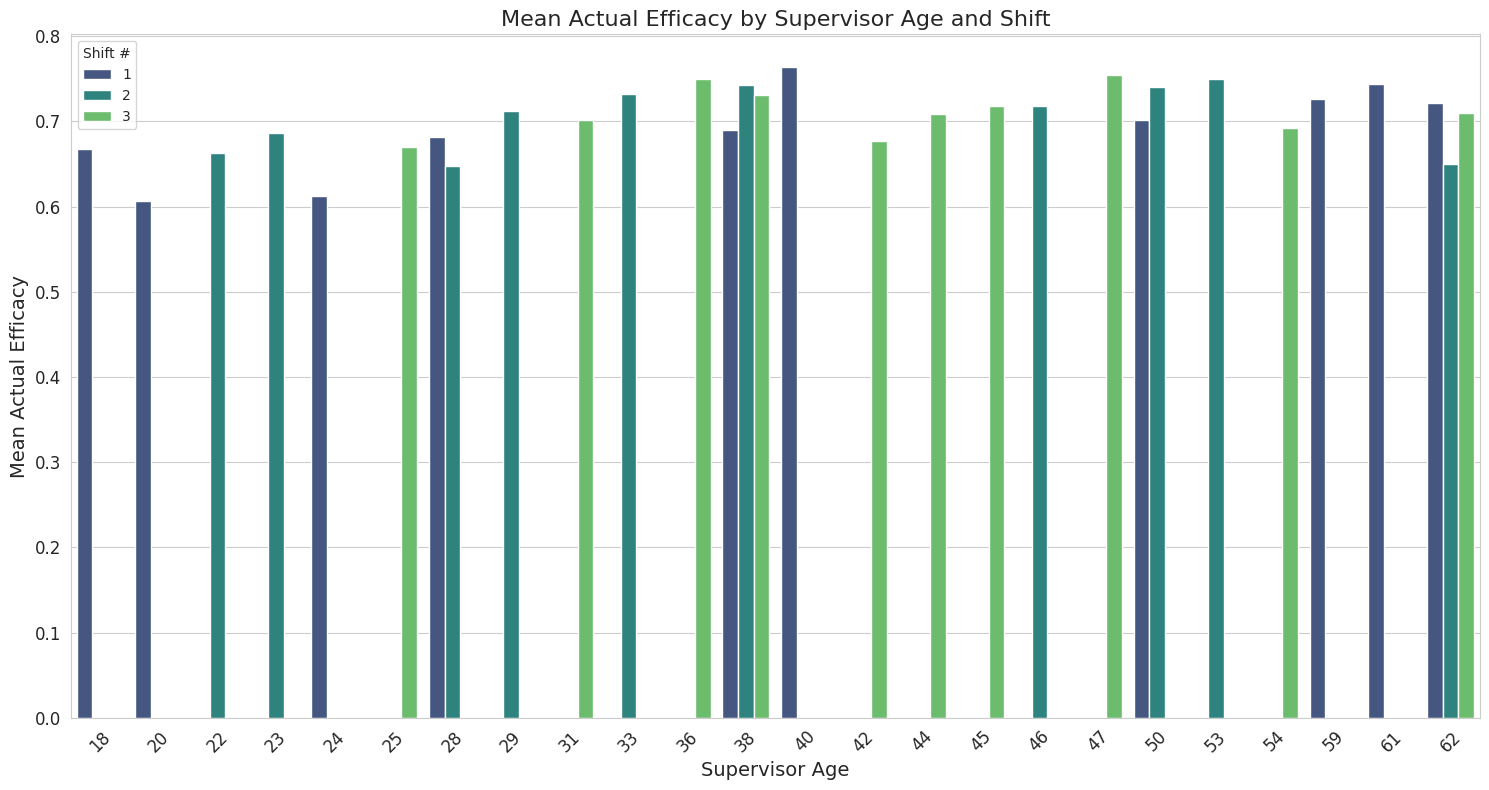

In [62]:
grouped_df = filtered_df.groupby(['sup_age', 'sub_shift']).mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='sup_age', y='actual_efficacy_h', hue='sub_shift', data=grouped_df, palette='viridis')

plt.title('Mean Actual Efficacy by Supervisor Age and Shift', fontsize=16)
plt.xlabel('Supervisor Age', fontsize=14)
plt.ylabel('Mean Actual Efficacy', fontsize=14)
plt.legend(title='Shift #')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


## **Efficacy Trends over Time**

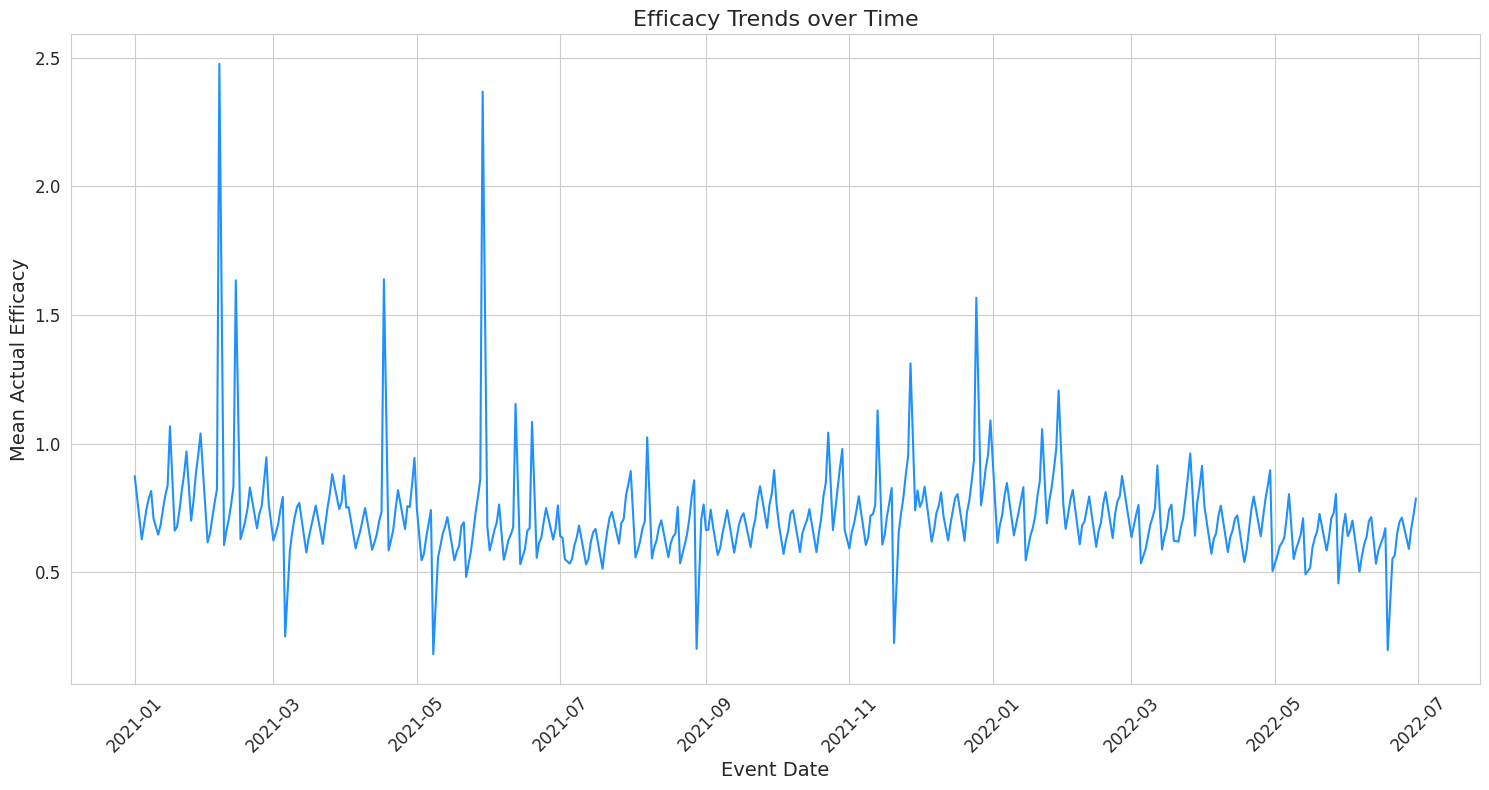

In [64]:
grouped_df = filtered_df.groupby('event_date').mean().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x='event_date', y='actual_efficacy_h', data=grouped_df, color='dodgerblue')

plt.title('Efficacy Trends over Time', fontsize=16)
plt.xlabel('Event Date', fontsize=14)
plt.ylabel('Mean Actual Efficacy', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


# **Cluster Analysis**

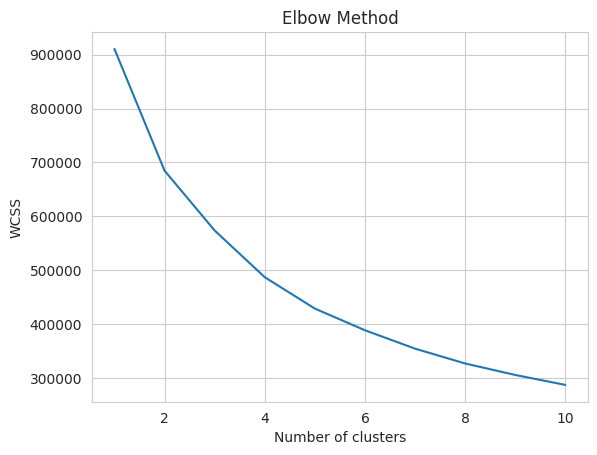

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    88645
0    53529
1    39956
Name: Cluster, dtype: int64


In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Features for clustering
X_clustering = filtered_df[['sub_age', 'sub_shift', 'sup_age', 'actual_efficacy_h', 'recorded_efficacy']]

# It's important to scale data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Using the Elbow method to find a good number of clusters using WCSS (within-cluster sum of squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming 3 clusters is the optimal number from the elbow plot
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

filtered_df['Cluster'] = clusters

# Checking the distribution in each cluster
print(filtered_df['Cluster'].value_counts())


In [72]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Features for clustering
X_clustering = filtered_df[['sub_age', 'sub_shift', 'actual_efficacy_h']]

# Scale data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Clustering using 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

filtered_df['Cluster'] = clusters

# Checking the distribution in each cluster
print(filtered_df['Cluster'].value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    60957
2    60954
0    60219
Name: Cluster, dtype: int64


## **Cluster Profiling:**

<ipython-input-73-4d2d32f19ca2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = filtered_df.drop(columns=columns_to_drop).groupby('Cluster').mean()


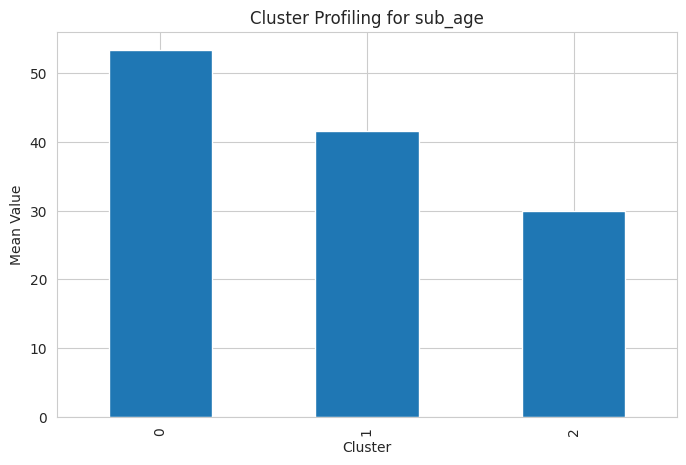

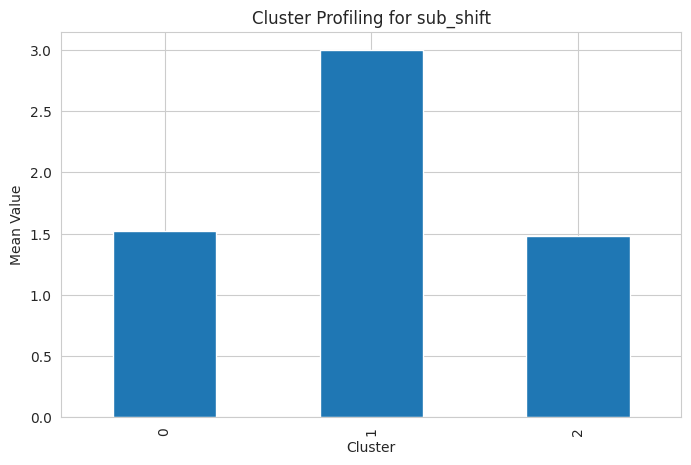

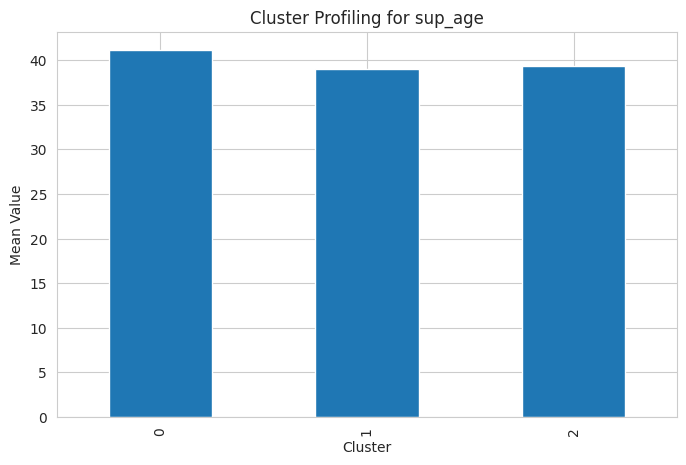

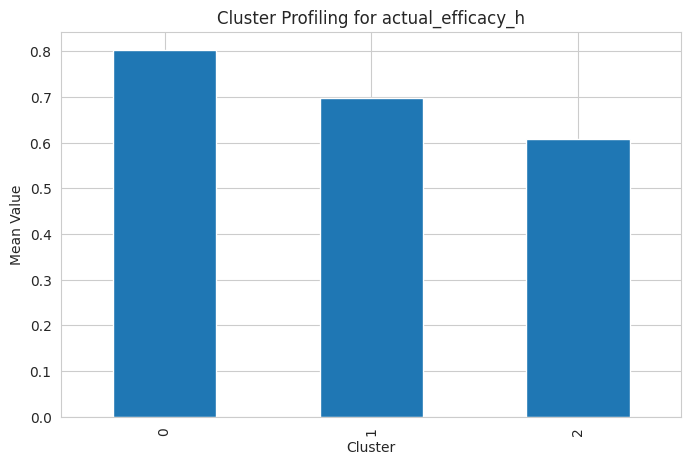

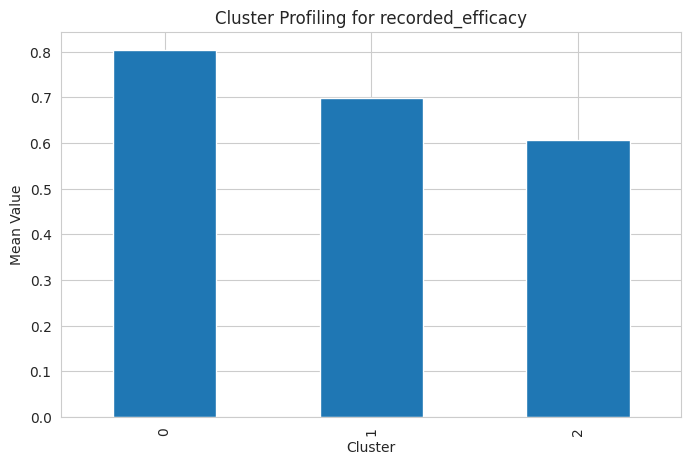

In [73]:
# Drop identifier columns for profiling
columns_to_drop = ['sub_ID','sup_ID']
cluster_profiles = filtered_df.drop(columns=columns_to_drop).groupby('Cluster').mean()

# Plotting each feature in a separate subplot
for column in cluster_profiles.columns:
    cluster_profiles[column].plot(kind='bar', figsize=(8,5))
    plt.title(f'Cluster Profiling for {column}')
    plt.ylabel('Mean Value')
    plt.show()


## **Examine Data Within Each Cluster:**

In [74]:
cluster_0_data = filtered_df[filtered_df['Cluster'] == 0]


In [75]:
cluster_0_data.head()

,sub_ID,sub_age,sub_shift,sup_ID,sup_age,event_date,actual_efficacy_h,recorded_efficacy,Cluster
1,98000001,40,1,98000216,24,2021-01-01,1.489,1.2,0
3,98000002,61,1,98000216,24,2021-01-01,1.023,0.8,0
10,98000005,59,1,98000216,24,2021-01-01,0.108,0.1,0
14,98000007,50,1,98000216,24,2021-01-01,0.712,0.7,0
16,98000008,62,1,98000216,24,2021-01-01,0.510,0.4,0


# **Classification of Efficacy**

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming `filtered_df` is your dataframe
# Create a binary target variable: 1 if 'High', 0 if 'Low'
threshold = filtered_df['actual_efficacy_h'].median()
filtered_df['efficacy_class'] = (filtered_df['actual_efficacy_h'] > threshold).astype(int)

# Features and Target
X = filtered_df[['sub_age', 'sub_shift', 'sup_age', 'recorded_efficacy']]
y = filtered_df['efficacy_class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90     18152
           1       0.91      0.89      0.90     18274

    accuracy                           0.90     36426
   macro avg       0.90      0.90      0.90     36426
weighted avg       0.90      0.90      0.90     36426

Accuracy: 0.903008839839675


The results you've provided seem to be a classification report, which gives detailed metrics about the performance of a classification model. Let's break it down:

1. **Classes (0 and 1)**: You've converted the 'actual_efficacy_h' into two classes, presumably 'Low' (0) and 'High' (1), based on a threshold.

2. **Precision**:
    - For class 0: Out of all the instances the model predicted as class 0 (Low), 89% were actually class 0.
    - For class 1: Out of all the instances the model predicted as class 1 (High), 91% were actually class 1.

3. **Recall**:
    - For class 0: Out of all the actual class 0 instances, the model correctly identified 91% of them.
    - For class 1: Out of all the actual class 1 instances, the model correctly identified 89% of them.

4. **F1-Score**: It's the harmonic mean of precision and recall. A higher F1 score is better, and it's particularly useful when the class distributions are imbalanced.
    - Both classes have a F1-score of 0.90, which is relatively high and indicates a good balance of precision and recall.

5. **Support**:
    - Class 0: 18,152 actual instances.
    - Class 1: 18,274 actual instances.

    It indicates a nearly balanced dataset, which is often beneficial for model performance.

6. **Accuracy**: This is the overall percentage of correct predictions. Your model's accuracy is 90.3%, meaning it correctly predicted the class (either 0 or 1) for 90.3% of the test samples.

7. **Macro Avg**: It calculates the metric independently for each class and then takes the average. It treats all classes equally.

8. **Weighted Avg**: It calculates metrics for each label, and their average weighted by support (the number of true instances for each label). It can be useful when dealing with imbalanced datasets.

### Implications:

- **Model Performance**: Your model is performing quite well, with an accuracy of 90.3%. Both precision and recall for the two classes are also above 89%, indicating a good balance between false positives and false negatives.

- **Practical Use**: Given this model's performance, it can reliably be used to predict the efficacy of an unknown sample as either 'High' or 'Low'.

However, always consider the specific use-case and the implications of false positives or false negatives. Depending on the context, you might prioritize one metric (e.g., precision or recall) over the others.